# 💥 Primeros pasos con ``Python`` y ``SQL`` 💥

|| <a style="background-color: #1bf8ff; color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">22 de Mayo del 2025</a> ||
<a style="background-color: #1bf8ff; color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">Clase 4</a> ||
<a style="background-color: #1bf8ff; color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">Cursos PyM</a> ||
<a style="background-color: #1bf8ff; color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">Luis Fernando Apáez Álvarez</a> ||

## 🪗Acordeón de clase🪗

De manera rápida podemos recordar que en la clase pasada logramos montar un dataframe de ventas dentro de nuestra tabla en ``SQL``. Adicionalmente, recordemos que podemos automatizar procesos mediante funciones, que de hecho ya automatizamos la generación del dataframe con la función ``generar_df_ventas``. Así

**Objetivo de clase:** Complementar la automatización montando ahora la generación de la base de datos y la tabla, adicionalmente agregando una función para realizar consultas a la tabla.

Para lograr imprimir el ticket anterior aprenderemos:

<a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">+Funciones</a> &nbsp; &nbsp; <a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">+SQL</a> &nbsp; &nbsp; <a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">POO</a> &nbsp; &nbsp; <a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">+Fechas</a> &nbsp; &nbsp; <a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">POO</a>
&nbsp; &nbsp; <a style="background-color:rgb(213, 255, 27); color: #000000; border: none; padding: 10px 15px; border-radius: 5px;">Crear una librería</a> 

# Parte VII: Automatización del proyecto

Comenzamos por traer la función que nos genera el dataframe:

In [2]:
def generar_df_ventas(fecha, n_ventas):
  import pandas as pd
  import random as r
  
  # ========================== Parte I ==========================
  # Definicion de las listas
  abcdario = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z'
    ]

  papelerias = [
    'Xochimilco', 'Cuemanco', 'Coapa', 'Milpa Alta',
    'CU', 'Zócalo', 'Narvarte', 'Santa Fé', 'Polanco',
    'Centro'
    ]

  lineas = [
      'Cuadernos', 'Libretas', 'Lápices', 'Plumones', 'Borradores', 'Sacapuntas',
      'Laptops', 'Tablets', 'Mochilas', 'Bolsas', 'Cajas', 'Pegamento', 'Tijeras',
      'Monitores', 'Teclados', 'Mouse', 'Audífonos', 'Cables', 'Cargadores', 'Baterías',
      'Pc', 'Uniformes', 'Pinturas', 'Pinceles', 'Papel', 'Cartulinas'
      ]

  # =========================== Parte II ==========================
  # Definimos listas vacias que posteriormente iremos llenando
  # con los datos de cada venta mediante la funcion append()
  # y el bucle for

  fechas = []
  productos = []
  claves = []
  cantidades = []
  precios = []
  totales = []
  sucursales = []

  # ========================= Parte III ==========================
  # Repetimos un bucle for 1000 veces, donde en cada iteracion
  # o cada vuelta, agregamos un nuevo elemento a cada lista
  for i in range(n_ventas):
      # Zona de definicion de variables
      producto = r.choice(lineas)
      clave = r.choice(abcdario) + r.choice(abcdario) + r.choice(abcdario) + '-' + str(r.randint(1, 9)) + str(r.randint(1, 9)) + str(r.randint(1, 9)) 
      cantidad = r.randint(1, 50)
      precio = round(r.randint(1, 10000) * r.random(), 2)
      total = round(precio * cantidad, 2)
      sucursal = r.choice(papelerias)

      # Agregamos los datos a las listas
      fechas.append(fecha)
      productos.append(producto)
      claves.append(clave)
      cantidades.append(cantidad)
      precios.append(precio)
      totales.append(total)
      sucursales.append(sucursal)

  # ========================= Parte IV ==========================
  # Definimos un diccionario donde las claves seran los nombres
  # de las columnas y los valores seran las listas que llenamos
  dict_pre_ventas = {
      "Fecha": fechas,
      "Producto": productos,
      "Clave": claves,
      "Cantidad": cantidades,
      "Precio": precios,
      "Total": totales,
      "Sucursal": sucursales
  }

  # ========================== Parte V ==========================
  # Creamos el dataframe con la funcion de pandas pd.DataFrame()
  df_ventas = pd.DataFrame(dict_pre_ventas)
  
  # Retornamos el dataframe
  return df_ventas

Continuando con el proceso de automatización podemos utilizar lo aprendido en la clase anterior para crear la estructura SQL y subir además el dataframe de ventas generado con la función anterior, de modo que, hasta ahora, el proceso que estamos buscando montar es de la forma:

1. Se genera la información de las ventas de un día en particular.
2. En caso de no existir, se crea la infraestructura SQL.
3. Se sube el dataframe del punto 1 a la base de datos.

Como en el punto uno ya tenemos la función automatizada, lo que nos resta es realizar la automatización del punto dos y tres:

In [ ]:
# El codigo que podemos ver a continuacion genera las ventas de un dia y nos arroja un dataframe, 
# el cual posteriormente subimos a una base de datos SQLite:

import sqlite3 as sql

# 0. Creamos info de ventas de un dia
df = generar_df_ventas('2023-10-01', 1000)

# 1. Creamos la base de datos y subimos el dataframe a la base de datos
conn = sql.connect('ventas.db')

# 2. Creamos o reemplazamos la tabla 'ventas' en la base de datos
# if_exists = 'replace' significa que si la tabla ya existe, la reemplazamos
# if_exists = 'append' significa que si la tabla ya existe, agregamos los datos
df.to_sql('ventas', conn, if_exists='replace', index=False)

# 3. Guardamos cambios y cerramos la conexion
conn.commit()
conn.close()

Notemos que siempre será necesario inicialmente utilizar to_sql('ventas', conn, if_exists='replace', index=False) cuando no hayamos creado la tabla, pues con el código anterior la crearemos, es decir, siempre es necesario _inicializar_ nuestra tabla subiendo un dataframe. Asi como tenemos el código anterior es como lo "automatizaremos" con una función como sigue:

In [ ]:
def inicializar_bbdd(df):
    import sqlite3 as sql
    import pandas as pd

    # Creamos la conexion o la base de datos
    conn = sql.connect('ventas.db')
    # Subimos el dataframe a la base de datos
    df.to_sql('ventas', conn, if_exists='replace', index=False)
    # Guardamoscambios y cerramos la conexion
    conn.commit()
    conn.close()

    # Arrojamos un mensaje de finalizado el proceso
    print("Base de datos inicializada y datos subidos correctamente.")

Una vez inicializado, el proceso para subir los siguientes dataframes es muy similar, solo que cambiamos, como ya sabemos, el parámetro if_exists = 'replace' por if_exists='append', de tal suerte de manera rápida podemos automatizar la otra funcionalidad

In [6]:
# Esencialmente es el mismo codigo de la funcion anterior
# con la unica diferencia del valor asignado al parametro if_exists
def subir_df(df):
    import sqlite3 as sql
    import pandas as pd

    # Creamos la conexion o la base de datos
    conn = sql.connect('ventas.db')
    # Subimos el dataframe a la base de datos
    df.to_sql('ventas', conn, if_exists='', index=False)
    # Guardamoscambios y cerramos la conexion
    conn.commit()
    conn.close()

    print("Dataframe subido correctamente a la base de datos.")

In [ ]:
# Como un extra podemos definir una función para hacer consultas a nuestra tabla
def consultar_bbdd(query):
    import sqlite3 as sql
    import pandas as pd

    # Creamos la conexion o la base de datos
    conn = sql.connect('ventas.db')
    # Hacemos una consulta a la tabla ventas
    consulta = pd.read_sql_query(query, conn)
    # Cerramos la conexion
    conn.close()

    return consulta

Antes de poner en un solo lugar el código del proyecto automatizado, veamos el tema de strings multilínea:

In [1]:
# Si queremos mandar a imprimir un mensaje como el siguiente:
# Hola
# Luis

# podriamos utilizar en una cadena de texto simple el comando \n que significa salto de linea
print("Hola\nLuis")

Hola
Luis


In [2]:
# Pero tambien tenemos el concepto de string multilinea que justamente nos permite realizar la misma accion
# Para definir uno de estos usamos triple comillas simples o dobles
saludo = """
Hola
Mundo
"""

# Mandamos a imprimir el saludo
print(saludo)


Hola
Mundo



Los strings multilínea nos servirán para _documentar_ nuestras funciones, de donde:

* En programación, la documentación es una explicación escrita que describe qué hace un bloque de código, cómo se usa y, en algunos casos, por qué se escribió de cierta forma. Su objetivo es ayudar a otros programadores (o a ti mismo en el futuro) a entender y reutilizar el código más fácilmente.

* En ``Python``, una forma común de documentar funciones es con strings multilínea, también llamados _docstrings_.
Un _docstring_ es un texto entre triple comilla ("""texto""" o '''texto''') que se coloca justo después de la definición de una función. Este string no se ejecuta como código, pero ``Python`` lo reconoce como la descripción oficial del bloque.

Luego entonces, conjuntamos en un solo lugar el código del proyecto colocando una pequeña documentación de qué es lo que hace cada función:

In [ ]:
def generar_df_ventas(fecha, n_ventas):
  """
  Genera un DataFrame de ventas simuladas para una fecha específica.

  Parámetros:
  -----------
  fecha : str
      Fecha de las ventas en formato 'YYYY-MM-DD'.
  n_ventas : int
      Número de registros (ventas) a generar.

  Retorna:
  --------
  df_ventas : pandas.DataFrame
      DataFrame con las columnas: 'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.
      Cada fila representa una venta simulada con datos aleatorios.

  Ejemplo de uso:
  ---------------
  df = generar_df_ventas('2025-01-01', 1000)
  """

  import pandas as pd
  import random as r
  
  # ========================== Parte I ==========================
  # Definicion de las listas
  abcdario = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z'
    ]

  papelerias = [
    'Xochimilco', 'Cuemanco', 'Coapa', 'Milpa Alta',
    'CU', 'Zócalo', 'Narvarte', 'Santa Fé', 'Polanco',
    'Centro'
    ]

  lineas = [
      'Cuadernos', 'Libretas', 'Lápices', 'Plumones', 'Borradores', 'Sacapuntas',
      'Laptops', 'Tablets', 'Mochilas', 'Bolsas', 'Cajas', 'Pegamento', 'Tijeras',
      'Monitores', 'Teclados', 'Mouse', 'Audífonos', 'Cables', 'Cargadores', 'Baterías',
      'Pc', 'Uniformes', 'Pinturas', 'Pinceles', 'Papel', 'Cartulinas'
      ]

  # =========================== Parte II ==========================
  # Definimos listas vacias que posteriormente iremos llenando
  # con los datos de cada venta mediante la funcion append()
  # y el bucle for

  fechas = []
  productos = []
  claves = []
  cantidades = []
  precios = []
  totales = []
  sucursales = []

  # ========================= Parte III ==========================
  # Repetimos un bucle for 1000 veces, donde en cada iteracion
  # o cada vuelta, agregamos un nuevo elemento a cada lista
  for i in range(n_ventas):
      # Zona de definicion de variables
      producto = r.choice(lineas)
      clave = r.choice(abcdario) + r.choice(abcdario) + r.choice(abcdario) + '-' + str(r.randint(1, 9)) + str(r.randint(1, 9)) + str(r.randint(1, 9)) 
      cantidad = r.randint(1, 50)
      precio = round(r.randint(1, 10000) * r.random(), 2)
      total = round(precio * cantidad, 2)
      sucursal = r.choice(papelerias)

      # Agregamos los datos a las listas
      fechas.append(fecha)
      productos.append(producto)
      claves.append(clave)
      cantidades.append(cantidad)
      precios.append(precio)
      totales.append(total)
      sucursales.append(sucursal)

  # ========================= Parte IV ==========================
  # Definimos un diccionario donde las claves seran los nombres
  # de las columnas y los valores seran las listas que llenamos
  dict_pre_ventas = {
      "Fecha": fechas,
      "Producto": productos,
      "Clave": claves,
      "Cantidad": cantidades,
      "Precio": precios,
      "Total": totales,
      "Sucursal": sucursales
  }

  # ========================== Parte V ==========================
  # Creamos el dataframe con la funcion de pandas pd.DataFrame()
  df_ventas = pd.DataFrame(dict_pre_ventas)
  
  # Retornamos el dataframe
  return df_ventas

def inicializar_bbdd(df):
  """
  Inicializa la base de datos y crea la tabla 'ventas' con los datos de un DataFrame.

  Parámetros:
  -----------
  df : pandas.DataFrame
      DataFrame con la información de ventas a subir. Debe contener las columnas:
      'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.

  Retorna:
  --------
  None

  Ejemplo de uso:
  ---------------
  inicializar_bbdd(df)
  """
  import sqlite3 as sql
  import pandas as pd

  # Creamos la conexion o la base de datos
  conn = sql.connect('ventas.db')
  # Subimos el dataframe a la base de datos
  df.to_sql('ventas', conn, if_exists='replace', index=False)
  # Guardamoscambios y cerramos la conexion
  conn.commit()
  conn.close()

  print("Base de datos inicializada y datos subidos correctamente.")

# Esencialmente es el mismo codigo de la funcion anterior
# con la unica diferencia del valor asignado al parametro if_exists
def subir_df(df):
  """
  Agrega los datos de un DataFrame a la tabla 'ventas' existente en la base de datos.

  Parámetros:
  -----------
  df : pandas.DataFrame
      DataFrame con la información de ventas a agregar. Debe contener las columnas:
      'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.

  Retorna:
  --------
  None

  Ejemplo de uso:
  ---------------
  subir_df(df)
  """
  import sqlite3 as sql
  import pandas as pd

  # Creamos la conexion o la base de datos
  conn = sql.connect('ventas.db')
  # Subimos el dataframe a la base de datos
  df.to_sql('ventas', conn, if_exists='append', index=False)
  # Guardamoscambios y cerramos la conexion
  conn.commit()
  conn.close()

  print("Dataframe subido correctamente a la base de datos.")
    

# Como un extra podemos definir una función para hacer consultas a nuestra tabla
def consultar_bbdd(query):
  """
  Realiza una consulta SQL sobre la base de datos 'ventas.db' y devuelve el resultado como DataFrame.

  Parámetros:
  -----------
  query : str
      Consulta SQL a ejecutar sobre la base de datos.

  Retorna:
  --------
  consulta : pandas.DataFrame
      DataFrame con el resultado de la consulta.

  Ejemplo de uso:
  ---------------
  resultado = consultar_bbdd("SELECT * FROM ventas")
  """
  import sqlite3 as sql
  import pandas as pd

  # Creamos la conexion o la base de datos
  conn = sql.connect('ventas.db')
  # Hacemos una consulta a la tabla ventas
  consulta = pd.read_sql_query(query, conn)
  # Cerramos la conexion
  conn.close()

  return consulta

Pongamos a prueba nuestro _compendio_ de funciones que hemos definido:

In [11]:
# 1. Creamos la info de un dia de ventas
df = generar_df_ventas('2025-01-02', 1000)

# 2. Inicializamos la base de datos
inicializar_bbdd(df)

# 3. Subimos un nuevo dataframe a la base de datos
df2 = generar_df_ventas('2025-01-03', 1000)
subir_df(df2)

##################################################
# 4. Hacemos una consulta a la base de datos
query = """
SELECT 
    * 
FROM 
    ventas
"""
consultar_bbdd(query)

Base de datos inicializada y datos subidos correctamente.
Dataframe subido correctamente a la base de datos.


,Fecha,Producto,Clave,Cantidad,Precio,Total,Sucursal
0,2025-01-02,Tablets,JON-581,7,2537.17,17760.19,Santa Fé
1,2025-01-02,Pc,MNX-442,25,3418.77,85469.25,Coapa
2,2025-01-02,Cables,LLQ-336,43,87.71,3771.53,Milpa Alta
3,2025-01-02,Teclados,GRW-719,43,4190.87,180207.41,Coapa
4,2025-01-02,Cargadores,UPN-378,46,1900.80,87436.80,Polanco
...,...,...,...,...,...,...,...
1995,2025-01-03,Papel,VAV-748,16,5167.97,82687.52,Centro
1996,2025-01-03,Audífonos,UCN-637,1,2660.45,2660.45,Cuemanco
1997,2025-01-03,Libretas,GUX-529,5,239.58,1197.90,CU
1998,2025-01-03,Monitores,FJO-314,22,3699.93,81398.46,Cuemanco


### Parte VIII: Creación de una librería

Seguramente el término de _compendio de funciones_ que utlizamos antes fue una pista de lo que haremos a continuación pues, naturalmente, el tener varias funciones agrupadas para un contexto en común encajan con la idea de librería. Así, con el código anterior en el cual definimos un compendio de funciones podemos definir, ahora, una librería para agruparlas. 

El concepto que nos permitirá crear nuestra propia librería es el de _clase_, donde ésta es un concepto dentro de la progamación que nos permite estructura código y segmentarlo para un fin en específico. Gracias a las _clases_ es como se definen las librerías y para ello escribirmos:

```
class nombre_clase:
    # contenido
```

Si te das cuenta definir una clase es bastante sencillo, por ende escribimos:

In [ ]:
# Definimos una clase que nos sirva para guardar y utilizar nuestras
# funcios
class tools:
    def generar_df_ventas(fecha, n_ventas):
        """
        Genera un DataFrame de ventas simuladas para una fecha específica.

        Parámetros:
        -----------
        fecha : str
            Fecha de las ventas en formato 'YYYY-MM-DD'.
        n_ventas : int
            Número de registros (ventas) a generar.

        Retorna:
        --------
        df_ventas : pandas.DataFrame
            DataFrame con las columnas: 'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.
            Cada fila representa una venta simulada con datos aleatorios.

        Ejemplo de uso:
        ---------------
        df = generar_df_ventas('2025-01-01', 1000)
        """

        import pandas as pd
        import random as r
        
        # ========================== Parte I ==========================
        # Definicion de las listas
        abcdario = [
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
            'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
            ]

        papelerias = [
            'Xochimilco', 'Cuemanco', 'Coapa', 'Milpa Alta',
            'CU', 'Zócalo', 'Narvarte', 'Santa Fé', 'Polanco',
            'Centro'
            ]

        lineas = [
            'Cuadernos', 'Libretas', 'Lápices', 'Plumones', 'Borradores', 'Sacapuntas',
            'Laptops', 'Tablets', 'Mochilas', 'Bolsas', 'Cajas', 'Pegamento', 'Tijeras',
            'Monitores', 'Teclados', 'Mouse', 'Audífonos', 'Cables', 'Cargadores', 'Baterías',
            'Pc', 'Uniformes', 'Pinturas', 'Pinceles', 'Papel', 'Cartulinas'
            ]

        # =========================== Parte II ==========================
        # Definimos listas vacias que posteriormente iremos llenando
        # con los datos de cada venta mediante la funcion append()
        # y el bucle for

        fechas = []
        productos = []
        claves = []
        cantidades = []
        precios = []
        totales = []
        sucursales = []

        # ========================= Parte III ==========================
        # Repetimos un bucle for 1000 veces, donde en cada iteracion
        # o cada vuelta, agregamos un nuevo elemento a cada lista
        for i in range(n_ventas):
            # Zona de definicion de variables
            producto = r.choice(lineas)
            clave = r.choice(abcdario) + r.choice(abcdario) + r.choice(abcdario) + '-' + str(r.randint(1, 9)) + str(r.randint(1, 9)) + str(r.randint(1, 9)) 
            cantidad = r.randint(1, 50)
            precio = round(r.randint(1, 10000) * r.random(), 2)
            total = round(precio * cantidad, 2)
            sucursal = r.choice(papelerias)

            # Agregamos los datos a las listas
            fechas.append(fecha)
            productos.append(producto)
            claves.append(clave)
            cantidades.append(cantidad)
            precios.append(precio)
            totales.append(total)
            sucursales.append(sucursal)

        # ========================= Parte IV ==========================
        # Definimos un diccionario donde las claves seran los nombres
        # de las columnas y los valores seran las listas que llenamos
        dict_pre_ventas = {
            "Fecha": fechas,
            "Producto": productos,
            "Clave": claves,
            "Cantidad": cantidades,
            "Precio": precios,
            "Total": totales,
            "Sucursal": sucursales
        }

        # ========================== Parte V ==========================
        # Creamos el dataframe con la funcion de pandas pd.DataFrame()
        df_ventas = pd.DataFrame(dict_pre_ventas)
    
        # Retornamos el dataframe
        return df_ventas

    def inicializar_bbdd(df):
        """
        Inicializa la base de datos y crea la tabla 'ventas' con los datos de un DataFrame.

        Parámetros:
        -----------
        df : pandas.DataFrame
            DataFrame con la información de ventas a subir. Debe contener las columnas:
            'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.

        Retorna:
        --------
        None

        Ejemplo de uso:
        ---------------
        inicializar_bbdd(df)
        """
        import sqlite3 as sql
        import pandas as pd

        # Creamos la conexion o la base de datos
        conn = sql.connect('ventas.db')
        # Subimos el dataframe a la base de datos
        df.to_sql('ventas', conn, if_exists='replace', index=False)
        # Guardamoscambios y cerramos la conexion
        conn.commit()
        conn.close()

        print("Base de datos inicializada y datos subidos correctamente.")

    # Esencialmente es el mismo codigo de la funcion anterior
    # con la unica diferencia del valor asignado al parametro if_exists
    def subir_df(df):
        """
        Agrega los datos de un DataFrame a la tabla 'ventas' existente en la base de datos.

        Parámetros:
        -----------
        df : pandas.DataFrame
            DataFrame con la información de ventas a agregar. Debe contener las columnas:
            'Fecha', 'Producto', 'Clave', 'Cantidad', 'Precio', 'Total', 'Sucursal'.

        Retorna:
        --------
        None

        Ejemplo de uso:
        ---------------
        subir_df(df)
        """
        import sqlite3 as sql
        import pandas as pd

        # Creamos la conexion o la base de datos
        conn = sql.connect('ventas.db')
        # Subimos el dataframe a la base de datos
        df.to_sql('ventas', conn, if_exists='append', index=False)
        # Guardamoscambios y cerramos la conexion
        conn.commit()
        conn.close()

        print("Dataframe subido correctamente a la base de datos.")
            

    # Como un extra podemos definir una función para hacer consultas a nuestra tabla
    def consultar_bbdd(query):
        """
        Realiza una consulta SQL sobre la base de datos 'ventas.db' y devuelve el resultado como DataFrame.

        Parámetros:
        -----------
        query : str
            Consulta SQL a ejecutar sobre la base de datos.

        Retorna:
        --------
        consulta : pandas.DataFrame
            DataFrame con el resultado de la consulta.

        Ejemplo de uso:
        ---------------
        resultado = consultar_bbdd("SELECT * FROM ventas")
        """
        import sqlite3 as sql
        import pandas as pd

        # Creamos la conexion o la base de datos
        conn = sql.connect('ventas.db')
        # Hacemos una consulta a la tabla ventas
        consulta = pd.read_sql_query(query, conn)
        # Cerramos la conexion
        conn.close()

        return consulta

Si bien, para utilizar nuestra clase no haremos el gran cambio respecto al código que ya teníamos de nuestras funciones, el hacer este cambio nos permite tener más ordenado el código y además nos permitira reciclar código, y más adelante aprenderemos a importar nuestra clase o librería desde un archivo Python externo. De tal suerte, usemos el código de nuestra clase:

In [13]:
# 1. Creamos la info de un dia de ventas
df = tools.generar_df_ventas('2025-01-02', 1000)

# 2. Inicializamos la base de datos
tools.inicializar_bbdd(df)

# 3. Subimos un nuevo dataframe a la base de datos
df2 = tools.generar_df_ventas('2025-01-03', 1000)
tools.subir_df(df2)

##################################################
# 4. Hacemos una consulta a la base de datos
query = """
SELECT 
    * 
FROM 
    ventas
"""
tools.consultar_bbdd(query)

Base de datos inicializada y datos subidos correctamente.
Dataframe subido correctamente a la base de datos.


,Fecha,Producto,Clave,Cantidad,Precio,Total,Sucursal
0,2025-01-02,Pc,EQV-772,34,883.16,30027.44,Zócalo
1,2025-01-02,Pc,VLQ-162,6,156.74,940.44,Coapa
2,2025-01-02,Plumones,BRF-523,19,8244.50,156645.50,Narvarte
3,2025-01-02,Cartulinas,LKI-773,41,738.70,30286.70,Coapa
4,2025-01-02,Uniformes,MHV-384,10,157.42,1574.20,Cuemanco
...,...,...,...,...,...,...,...
1995,2025-01-03,Monitores,YHP-789,10,4876.31,48763.10,Xochimilco
1996,2025-01-03,Sacapuntas,HIH-669,22,3208.34,70583.48,Coapa
1997,2025-01-03,Cajas,DUD-744,22,2725.39,59958.58,Zócalo
1998,2025-01-03,Cargadores,UAB-632,46,20.98,965.08,Xochimilco


Lo que haremos a continuación es jugar con más sobre código SQL, pero antes de ello llenaremos nuestra tabla con la info de todo el mes de Enero, lo cual conseguiremos abordando un poco más el tema de fechas en Python. Lo que querremos hacer será generar un rango de fechas y a partir de ahí subir la info a nuestra tabla en SQL:

In [15]:
import pandas as pd
import datetime as dt

# Con pd.date_range() podemos crear un rango de fechas, entonces
# generamos el mes de enero
fechas_dt = pd.date_range(start='2025-01-01', end='2025-01-31', freq='D')
fechas_dt


DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Convertimos el rango de fechas a una lista
fechas_list = fechas_dt.tolist()
fechas_list

[Timestamp('2025-01-01 00:00:00'),
 Timestamp('2025-01-02 00:00:00'),
 Timestamp('2025-01-03 00:00:00'),
 Timestamp('2025-01-04 00:00:00'),
 Timestamp('2025-01-05 00:00:00'),
 Timestamp('2025-01-06 00:00:00'),
 Timestamp('2025-01-07 00:00:00'),
 Timestamp('2025-01-08 00:00:00'),
 Timestamp('2025-01-09 00:00:00'),
 Timestamp('2025-01-10 00:00:00'),
 Timestamp('2025-01-11 00:00:00'),
 Timestamp('2025-01-12 00:00:00'),
 Timestamp('2025-01-13 00:00:00'),
 Timestamp('2025-01-14 00:00:00'),
 Timestamp('2025-01-15 00:00:00'),
 Timestamp('2025-01-16 00:00:00'),
 Timestamp('2025-01-17 00:00:00'),
 Timestamp('2025-01-18 00:00:00'),
 Timestamp('2025-01-19 00:00:00'),
 Timestamp('2025-01-20 00:00:00'),
 Timestamp('2025-01-21 00:00:00'),
 Timestamp('2025-01-22 00:00:00'),
 Timestamp('2025-01-23 00:00:00'),
 Timestamp('2025-01-24 00:00:00'),
 Timestamp('2025-01-25 00:00:00'),
 Timestamp('2025-01-26 00:00:00'),
 Timestamp('2025-01-27 00:00:00'),
 Timestamp('2025-01-28 00:00:00'),
 Timestamp('2025-01-

Vemos que los elementos de nuestra lista son objetos fecha, y nosotros queremos que éstos sean string, pero afortunadamente ya conocemos una función de la librería ``datetime`` que nos ayudará a realizar la conversión

In [ ]:
# Definimos una lista vacia en la cual agregaremos
# posteriormente las fechas como strings
fechas_str = []

# Recorremos nuestra lista de objetos fecha y para cada
# una de ellas, convertimos el objeto a un string
for fecha in fechas_list:
    # Convertimos la fecha a un string
    fecha_str = dt.datetime.strftime(fecha, '%Y-%m-%d')
    # Agregamos la fecha a la lista
    fechas_str.append(fecha_str)

fechas_str

['2025-01-01',
 '2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-11',
 '2025-01-12',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-18',
 '2025-01-19',
 '2025-01-20',
 '2025-01-21',
 '2025-01-22',
 '2025-01-23',
 '2025-01-24',
 '2025-01-25',
 '2025-01-26',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29',
 '2025-01-30',
 '2025-01-31']

In [ ]:
# Finalmente, aplicamos la funcion generar_df_ventas()
# a cada una de las fechas y las guardamos en una lista

for fecha_reporte in fechas_str:
    # Generamos el dataframe
    df = tools.generar_df_ventas(fecha_reporte, 1000)
    # Subimos el dataframe a la base de datos
    tools.subir_df(df)

Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente a la base de datos.
Dataframe subido correctamente 

In [20]:
# Comprobamos
query = """
SELECT
    *
FROM
    ventas
"""
df = tools.consultar_bbdd(query)
df

,Fecha,Producto,Clave,Cantidad,Precio,Total,Sucursal
0,2025-01-02,Pc,EQV-772,34,883.16,30027.44,Zócalo
1,2025-01-02,Pc,VLQ-162,6,156.74,940.44,Coapa
2,2025-01-02,Plumones,BRF-523,19,8244.50,156645.50,Narvarte
3,2025-01-02,Cartulinas,LKI-773,41,738.70,30286.70,Coapa
4,2025-01-02,Uniformes,MHV-384,10,157.42,1574.20,Cuemanco
...,...,...,...,...,...,...,...
32995,2025-01-31,Plumones,JHZ-959,41,739.98,30339.18,Polanco
32996,2025-01-31,Cajas,JVZ-929,2,1167.60,2335.20,Coapa
32997,2025-01-31,Cajas,JWW-188,39,2872.38,112022.82,CU
32998,2025-01-31,Monitores,HDZ-745,2,5862.35,11724.70,Santa Fé


---

Finalizamos esta sección creando nuestra propia librería, para ello seguimos la siguiente receta:

1. La notebook en la cual estas trabajando es un archivo que termina en ``.ipynb``, por ejemplo un excel puede terminar en ``xlsx``. Un archivo de ``Python`` "puro``, es decir que no está en formato notebook, termina en ``.py``, así, el primer paso es crear un archivo ``.py``.
2. Dentro de dicho archivo pegamos tal cual el código de nuestra clase, y con ello habremos creado nuestra librería.

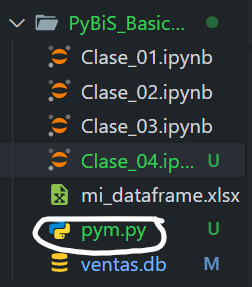

3. Desde esta notebook importamos nuestrav librería recién creada:

In [ ]:
# :o
from pym import tools

# y con ello nos estamos trayendo al entorno de trabajo nuestra clase
# y asi podemos utilizar todas sus funciones:

# tools.generar_df_ventas
# tools.inicializar_bbdd
# tools.subir_df
# tools.consultar_bbdd

### Parte IX: Consultas en SQL

En esta sección nos dedicaremos exclusivamente a estructurar consultas de información, lo cual nos permitirá hacer ciertos análisis extrayendo información de interés o también nos servirá para obtener un insumo para que podamos realizar, más adelante, un tablero en Power BI.

**1. Seleccionar columnas específicas**

In [ ]:
# Recuerda que * significa que queremos ver todas las columnas 
# en nuestra consulta, en este ejemplo solo nos esta interesando
# ver dos columnas en particular
query = """
SELECT  
    Fecha,
    Sucursal
FROM
    ventas
"""
consulta_1 = tools.consultar_bbdd(query)
consulta_1

,Fecha,Sucursal
0,2025-01-02,Zócalo
1,2025-01-02,Coapa
2,2025-01-02,Narvarte
3,2025-01-02,Coapa
4,2025-01-02,Cuemanco
...,...,...
32995,2025-01-31,Polanco
32996,2025-01-31,Coapa
32997,2025-01-31,CU
32998,2025-01-31,Santa Fé


y si solo queremos ver los primeros 5 registros (pero sin usar Pandas, porque eso ya lo sabemos hacer con Python).

**2. Limitar registros a visualizar**

Lo haemos con LIMIT 5 al final de nuestro SELECT

In [22]:
query = """
SELECT  
    Fecha,
    Sucursal
FROM
    ventas
-- Esto es un comentario en SQL
-- Limitamos a visualizacion para ver las 5 primeras filas
LIMIT 
    5
"""
consulta_2 = tools.consultar_bbdd(query)
consulta_2

,Fecha,Sucursal
0,2025-01-02,Zócalo
1,2025-01-02,Coapa
2,2025-01-02,Narvarte
3,2025-01-02,Coapa
4,2025-01-02,Cuemanco


In [ ]:
# adicionalmente podemos hacer una especio de paginacion
# por ejemplo, si queremos ver las filas de la 6 a la 10
# con la instruccion OFFSET
query = """
SELECT
    Fecha,
    Sucursal
FROM
    ventas
LIMIT
    5
OFFSET
    5
"""
consulta_3 = tools.consultar_bbdd(query)
consulta_3

,Fecha,Sucursal
0,2025-01-02,Centro
1,2025-01-02,Centro
2,2025-01-02,Milpa Alta
3,2025-01-02,Polanco
4,2025-01-02,Milpa Alta


**3. Continuara . . .**